## Pandas(3)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'key': list("ABCABC"),
                   "data1":range(6),
                   'data2':range(6,12)},
                   columns=['key','data1','data2'])
print(df) 

  key  data1  data2
0   A      0      6
1   B      1      7
2   C      2      8
3   A      3      9
4   B      4     10
5   C      5     11


In [3]:
def myfunc(x):
    "My function"
    return x.sum()//2

In [5]:
print(df[['key','data2']].groupby('key').agg(['sum','max',myfunc]))

    data2           
      sum max myfunc
key                 
A      15   9      7
B      17  10      8
C      19  11      9


In [6]:
df.groupby('key').aggregate({'data1':['sum','min'],'data2':myfunc})

data1      data2
      sum min myfunc
key                 
A       3   0      7
B       5   1      8
C       7   2      9

In [7]:
df.groupby('key').sum()

,data1,data2
key,,
A,3,15
B,5,17
C,7,19


In [9]:
df.groupby('key').filter(lambda x: x.data1.sum()>5)

,key,data1,data2
2,C,2,8
5,C,5,11


In [10]:
df 

,key,data1,data2
0,A,0,6
1,B,1,7
2,C,2,8
3,A,3,9
4,B,4,10
5,C,5,11


In [14]:
df.groupby('key').transform(lambda x : (x-x.min())/(x.max()-x.min()))

,data1,data2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0


In [15]:
import seaborn as sns

In [16]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [17]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [18]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
#3
planets[['method','number']].groupby('method').sum()

,number
method,
Astrometry,2
Eclipse Timing Variations,15
Imaging,50
Microlensing,27
Orbital Brightness Modulation,5
Pulsar Timing,11
Pulsation Timing Variations,1
Radial Velocity,952
Transit,776


In [23]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [22]:
#4 Calculate the average orbital period of planets for each discovery method.
planets[['method','orbital_period']].groupby('method').mean()

,orbital_period
method,
Astrometry,631.180000
Eclipse Timing Variations,4751.644444
Imaging,118247.737500
Microlensing,3153.571429
Orbital Brightness Modulation,0.709307
Pulsar Timing,7343.021201
Pulsation Timing Variations,1170.000000
Radial Velocity,823.354680
Transit,21.102073


In [ ]:
#5 Determine the maximum mass of planets discovered by each method 
df_mass = planets.dropna(subset='mass',
               inplace=False)
df_mass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 916
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          513 non-null    object 
 1   number          513 non-null    int64  
 2   orbital_period  513 non-null    float64
 3   mass            513 non-null    float64
 4   distance        498 non-null    float64
 5   year            513 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 28.1+ KB


In [31]:
df_mass[['method','mass']].groupby('method').max()

,mass
method,
Eclipse Timing Variations,6.05
Radial Velocity,25.00
Transit,1.47


In [ ]:
#6 Calculate the average distance from Earth to the planets discovered each year.


In [ ]:
#7 Count the number of planet discoveries by each method and year.


In [ ]:
#8 Aggregate the total number of planets and average mass by each method.


In [ ]:
#9 Filter methods of discovery that have discovered more than 20 planets in total.


In [32]:
#10 Apply a custom function to calculate the average mass of planets if the number of planets is greater than 1 within the group.



In [ ]:
#planets[['method','number']].groupby('method').sum()
#planets[['method','orbital_period']].groupby('method').mean()


In [33]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [36]:
titanic[['survived','sex']].groupby('sex').mean()

,survived
sex,
female,0.742038
male,0.188908


In [39]:
pd.pivot_table(data=titanic, 
               index='sex',
               columns='class',
               values='survived',
               aggfunc='sum')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10328\518018318.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=titanic,


class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [41]:
titanic.groupby(['class','sex'])['survived'].mean().unstack()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10328\3151600619.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['class','sex'])['survived'].mean().unstack()


sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [44]:
pd.pivot_table(data=titanic, 
               index='sex',
               columns=['pclass',"embark_town"],
               values='survived')

pclass              1                                2                         \
embark_town Cherbourg Queenstown Southampton Cherbourg Queenstown Southampton   
sex                                                                             
female       0.976744        1.0    0.958333       1.0        1.0    0.910448   
male         0.404762        0.0    0.354430       0.2        0.0    0.154639   

pclass              3                         
embark_town Cherbourg Queenstown Southampton  
sex                                           
female       0.652174   0.727273    0.375000  
male         0.232558   0.076923    0.128302

In [45]:
pd.pivot_table(data=titanic,
               index='deck',
               columns='pclass',
               values='survived',
               aggfunc='sum')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10328\740659344.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=titanic,


pclass,1,2,3
deck,,,
A,7,0,0
B,35,0,0
C,35,0,0
D,22,3,0
E,18,3,3
F,0,7,1
G,0,0,2


In [46]:
pd.pivot_table(data=titanic,
               index='class',
               columns='sex',
               values='age',
               aggfunc=['mean','median'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10328\1061108551.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=titanic,
C:\Users\Admin\AppData\Local\Temp\ipykernel_10328\1061108551.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=titanic,


mean            median      
sex        female       male female  male
class                                    
First   34.611765  41.281386   35.0  40.0
Second  28.722973  30.740707   28.0  30.0
Third   21.750000  26.507589   21.5  25.0

In [47]:
# Create age groups
age_groups = pd.cut(titanic['age'], 
                    bins=[0, 12, 18, 35, 60, 80], 
                    labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
# Add age group column to the DataFrame
titanic['age_group'] = age_groups


C:\Users\Admin\AppData\Local\Temp\ipykernel_10328\1164250372.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data=titanic,


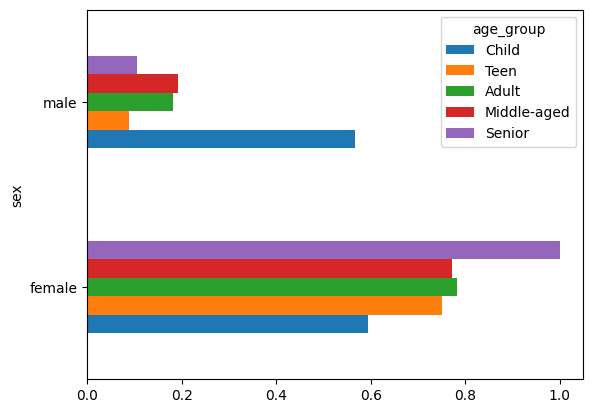

In [51]:
pd.pivot_table(data=titanic,
               index = 'sex',
               columns = 'age_group',
               values='survived').plot.barh();

In [ ]:
url = 'https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv' 
births = pd.read_csv(url)

In [55]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [61]:
df = pd.pivot_table(data = births,
               columns='gender',
               index='year',
               values='births',
               aggfunc='sum')

<Axes: title={'center': 'Title-1'}, xlabel='X-axis', ylabel='Y-axis'>

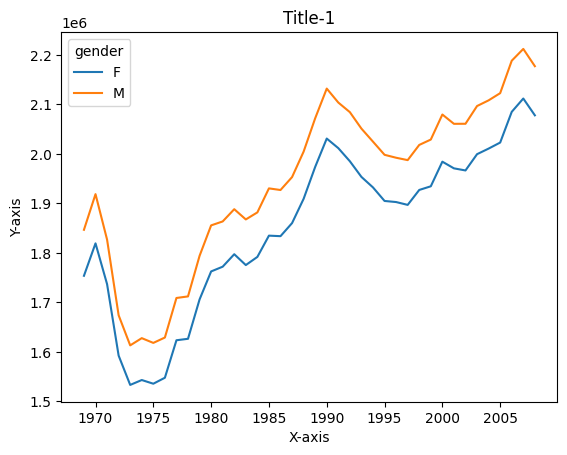

In [62]:
df.plot(kind = 'line',title='Title-1', xlabel='X-axis', ylabel='Y-axis')


<Axes: title={'center': 'Title-4'}, xlabel='X-axis', ylabel='Y-axis'>

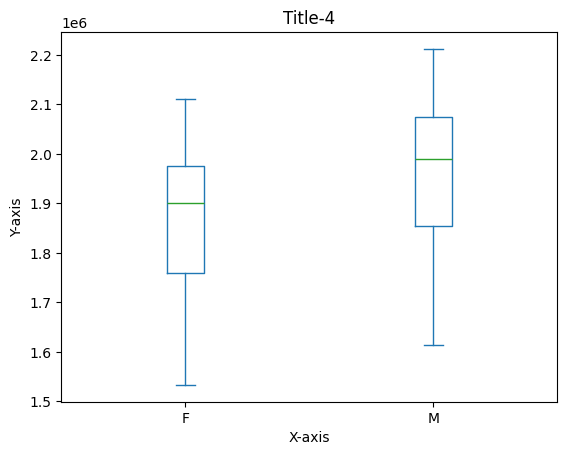

In [63]:
df.plot(kind='box',title='Title-4', xlabel='X-axis', ylabel='Y-axis')


<Axes: title={'center': 'Title-5'}, xlabel='X-axis', ylabel='Y-axis'>

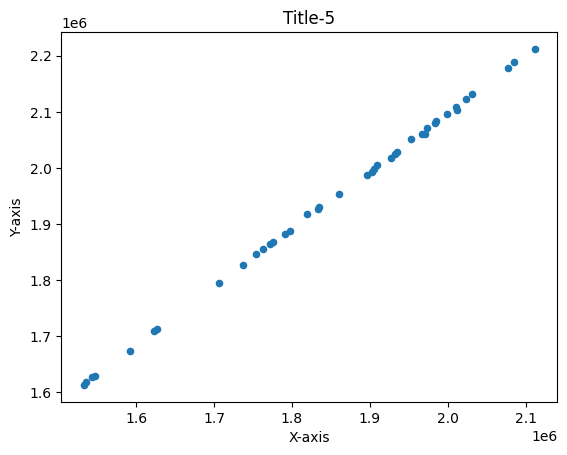

In [64]:
df.plot(kind='scatter', x='F', y='M',title='Title-5', xlabel='X-axis', ylabel='Y-axis')